In [93]:
from sklearn.datasets import load_boston
>>> X, y = load_boston(return_X_y=True)
>>> print(X.shape)

(506, 13)


In [94]:
import pandas as pd
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [95]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


TypeError: 'str' object is not callable

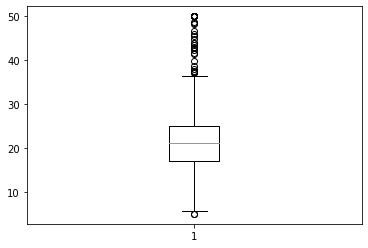

In [96]:
plt.boxplot(boston_df["MEDV"])
plt.ylabel('Median Value')
plt.title('Median Value of Owner Occupied Homes')
plt.show()

TypeError: 'str' object is not callable

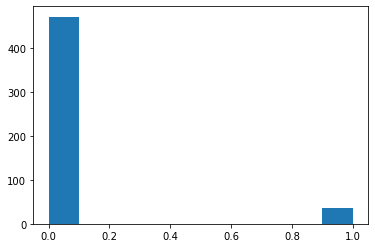

In [97]:
plt.hist(boston_df["CHAS"])
plt.xlabel('Whether Tract Bounds River')
plt.ylabel('Number of Houses')
plt.title('Charles River Dummy Variable')
plt.show

TypeError: 'str' object is not callable

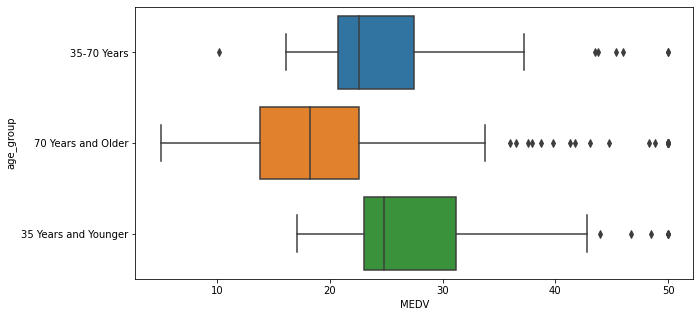

In [98]:
data=boston_df
data.loc[(data['AGE'] <= 35), 'age_group'] = '35 Years and Younger'
data.loc[(data['AGE'] > 35) & (data['AGE'] < 70), 'age_group'] = '35-70 Years'
data.loc[(data['AGE'] >= 70), 'age_group'] = '70 Years and Older'

plt.figure(figsize = (10,5))
sns.boxplot(x = data.MEDV, y = data.age_group, data = data)
plt.title('Number of Homes v. Age Group')

Text(0.5, 1.0, 'Nitic Oxide vs. Non-retail buildings')

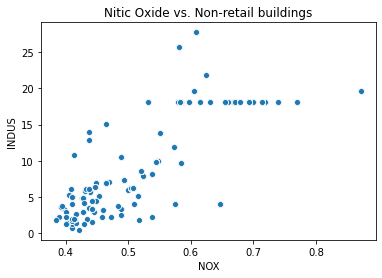

In [99]:
fig, ax = plt.subplots()
sns.scatterplot(x= boston_df["NOX"], y = boston_df["INDUS"])
ax.set_title("Nitic Oxide vs. Non-retail buildings")

##There is clearly a somewhat strong positive correlation between the Level of Nitric Oxide and the proportion of non-retail business acres per town

Text(0.5, 1.0, 'Pupil to Teacher Ratio')

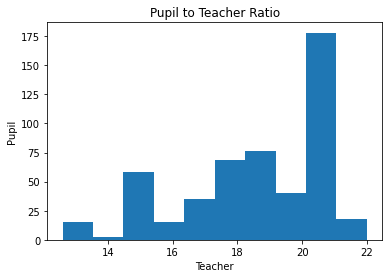

In [100]:
fig, ax = plt.subplots()
ax.hist(boston_df["PTRATIO"])
ax.set_xlabel('Teacher')
ax.set_ylabel('Pupil')
ax.set_title('Pupil to Teacher Ratio')


In [102]:
import scipy.stats as stats
##Null hypothesis is that there is not a significant difference between median value and houses bound to the river
A = data[data["CHAS"] == 0]["MEDV"]
B = data[data["CHAS"] == 1]["MEDV"]

stats.ttest_ind(A, B, axis = 0, equal_var = True)

##After seeing that our p-value is less than .05, we reject the null hypothesis and accept the alternative which is that there is a significant difference between median value and houses bound by the river

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

In [105]:
##Null hypothesis is that there is no significant difference between median value of houses and age
A_35_eval = data[data['age_group'] == '35 Years and Younger']['MEDV']
B_5_70_eval = data[data['age_group'] == '35-70 Years']['MEDV']
C_70_eval = data[data['age_group'] == '70 Years and Older']['MEDV']


f_statistic, p_value = stats.f_oneway(A_35_eval,B_5_70_eval,C_70_eval)
print("F_Statistic: {0}, p_value: {1}".format(f_statistic,p_value))
##Since our p-value is less than .05, we reject the null hypothesis and accept the alternative which is that there is a significant difference between median value of houses and age.

F_Statistic: 36.40764999196599, p_value: 1.7105011022702984e-15


In [106]:
##Null hypothesis is that there is no significant correlation between nitric oxide levels and non-retail business acres per town
stats.pearsonr(data["NOX"],data["INDUS"])

##since our correlation coefficient is .76, we establish that there is a strong positive correlation between nitric oxide levels and non-retail business acres per town.

(0.763651446920915, 7.913361061239593e-98)

In [110]:
import statsmodels.api as sm
X = data["DIS"]
y = data["MEDV"]

X = sm.add_constant(X)

model = sm.OLS(y,X).fit()
predictions = model.predict(X)

model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 11 Dec 2020   Prob (F-statistic):           1.21e-08
Time:                        23:11:17   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [111]:
np.sqrt(.062)

0.24899799195977465

In [112]:
##Since our p-value is less than .05, we reject the null hypothesis that there is no correlation. 
##Since our correlation coefficient is .249, we conclude that there is a weak positive relationship between the weighted distances to five Boston employment centres and the median value of owner occupied homes.